<a href="https://colab.research.google.com/github/ogunjosam/chaos_geomagnetic_storms/blob/main/SYM_H_chaos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import necessary packages for the analysis

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

!pip install PyRQA
from pyrqa.settings import Settings
from pyrqa.neighbourhood import FixedRadius
from pyrqa.metric import EuclideanMetric
from pyrqa.computation import RQAComputation

!pip install salem
!apt install gdal-bin python-gdal python3-gdal 
!pip install rasterio
!apt install python3-rtree 
!pip install git+git://github.com/geopandas/geopandas.git
!pip install descartes

!pip install pyunicorn
from pyunicorn.timeseries import RecurrencePlot


Import the data from Github

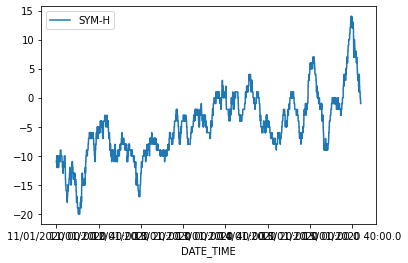

In [3]:
url = 'https://raw.githubusercontent.com/ogunjosam/chaos_geomagnetic_storms/main/demo_symh_data.csv'
xx = pd.read_csv(url,parse_dates=[['DATE','TIME']],usecols=['DATE','TIME','SYM-H'],index_col='DATE_TIME')

xx.plot()

Compute rolling analysis

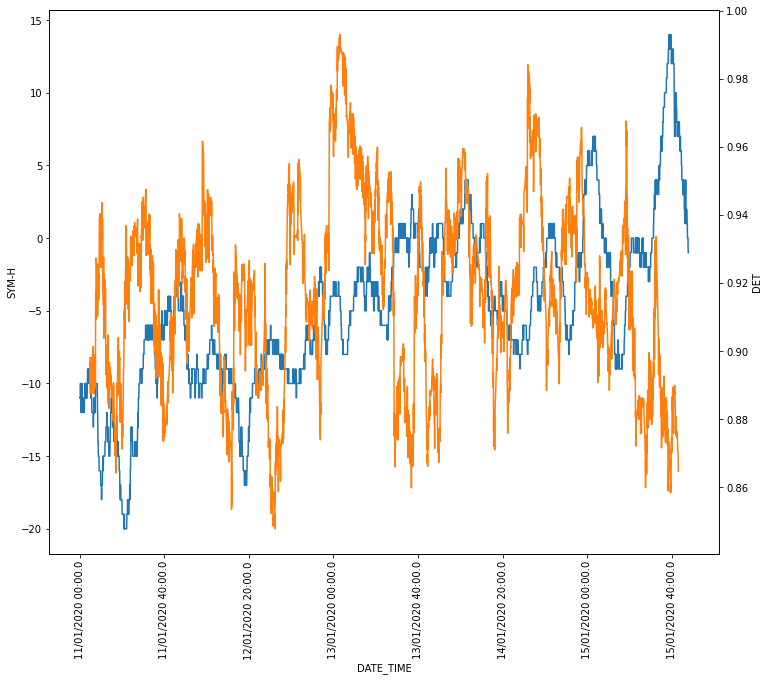

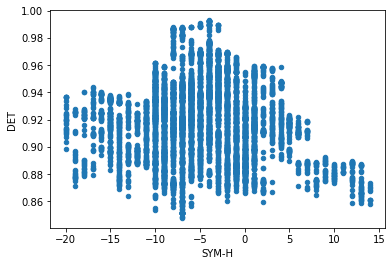

In [4]:
xy = xx.values
len(xy)

lag = 120

zy = np.empty(len(xy))
ky = np.empty(len(xy))
zy[:], ky[:] = np.NaN, np.NaN

for i in np.arange(lag,len(xy)-lag):
  uy = RecurrencePlot(xy[i-lag:i+lag],threshold=0.05,silence_level=10)
  ky[i] = np.mean(xy[i-lag:i+lag])
  zy[i] = uy.determinism()

fig, ax = plt.subplots(figsize=((12,10)))
xx['DET'] = zy
xx['MEAN'] = ky
xx['SYM-H'].plot(ax=ax,ylabel='SYM-H',secondary_y = False)
xx['DET'].plot(ax=ax,secondary_y = True, mark_right=True,rot=0)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.ylabel('DET')

fig, ax = plt.subplots()
xx.plot(x='SYM-H',y='DET',ax=ax,kind='scatter')

Loop over many stormy days 

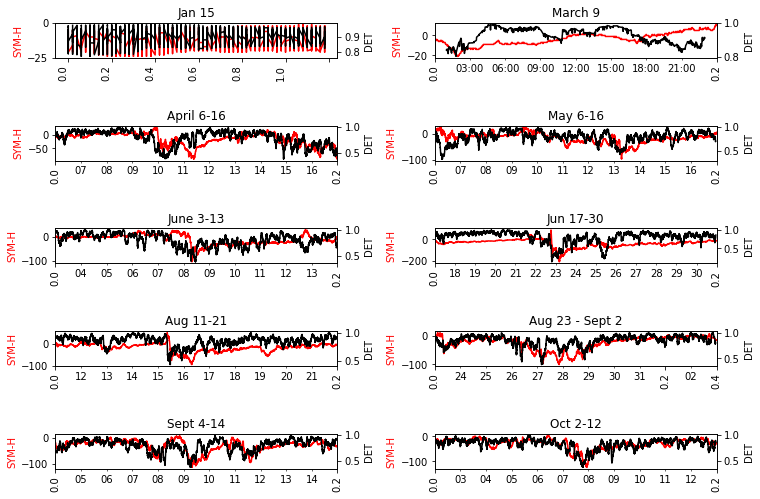

In [13]:
url = 'https://raw.githubusercontent.com/ogunjosam/chaos_geomagnetic_storms/main/SymH.xlsx'
lag = 60

fig,ax = plt.subplots(5,2,figsize=(10,8),sharex=False,sharey=False)
fig.subplots_adjust(hspace=0.0,wspace=0.0)
plt.tight_layout(h_pad=6,w_pad=6)
axf = ax.flatten()

xnam = pd.ExcelFile(url)
xx_tit = xnam.sheet_names

for j in np.arange(10):
  xx = pd.read_excel(url,parse_dates=[['DATE','TIME']],usecols=['DATE','TIME','SYM-H'],index_col='DATE_TIME',sheet_name=j)
  xy = xx.values

  zy = np.empty(len(xy))
  ky = np.empty(len(xy))
  zy[:], ky[:] = np.NaN, np.NaN

  for i in np.arange(lag,len(xy)-lag):
    uy = RecurrencePlot(xy[i-lag:i+lag],threshold=0.05,silence_level=10)
    ky[i] = np.mean(xy[i-lag:i+lag])
    zy[i] = uy.determinism()
  
  
  xx['DET'] = zy
  xx['MEAN'] = ky
  xx['SYM-H'].plot(ax=axf[j],ylabel='SYM-H',secondary_y = False,color='red')
  xx['DET'].plot(ax=axf[j],secondary_y = True, mark_right=True,rot=0,color='black')
  axf[j].set_xticklabels(axf[j].get_xticklabels(),rotation=90)
  axf[j].yaxis.label.set_color('red')
  axf[j].set_title(xx_tit[j])
  axf[j].set_xlabel('')
  plt.ylabel('DET')

  xx = []

